<a href="https://colab.research.google.com/github/umarpir/HousePricePredictor/blob/main/House_price_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies


In [ ]:
import seaborn as sb
import numpy as nps
import pandas as pds
import matplotlib.pyplot as pl
from sklearn.model_selection import  train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from google.colab import files
upload = files.upload()
from pandas.core.common import random_state
from math import sqrt

Saving pp-2019.csv to pp-2019.csv


importing the uk house price data set

In [ ]:
housing_dataset = pds.read_csv('pp-2019.csv')


In [ ]:
housing_dataframe = pds.DataFrame(house_price_dataset)

In [ ]:
housing_dataframe.head()

,Price Paid,Post code,House Type,New Build,Estate Type,Town/City,District,County
0,221950,TS17 5FF,D,Y,F,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES
1,246995,TS15 9ZH,D,Y,F,YARM,STOCKTON-ON-TEES,STOCKTON-ON-TEES
2,244950,TS18 2FN,T,Y,F,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES
3,139950,TS18 2FN,S,Y,F,STOCKTON-ON-TEES,STOCKTON-ON-TEES,STOCKTON-ON-TEES
4,271995,TS15 9FD,D,Y,F,YARM,STOCKTON-ON-TEES,STOCKTON-ON-TEES


In [ ]:
#housing datsaet length check
housing_dataframe.shape

(1002581, 8)

In [ ]:
# missing values check
housing_dataframe.isnull().sum() 

Price Paid        0
Post code      4883
House Type        0
New Build         0
Estate Type       0
Town/City         0
District          0
County            0
dtype: int64

In [ ]:
#drop  missing values columns
housing_dataframe = housing_dataframe.dropna(how='any')

In [ ]:
# missing values re-check
housing_dataframe.isnull().sum()

Price Paid     0
Post code      0
House Type     0
New Build      0
Estate Type    0
Town/City      0
District       0
County         0
dtype: int64

In [ ]:
# dataset length re-check
housing_dataframe.shape

(997698, 8)

In [ ]:
housing_dataframe.describe(include = 'all')

,Price Paid,Post code,House Type,New Build,Estate Type,Town/City,District,County
count,9.976980e+05,997698,997698,997698,997698,997698,997698,997698
unique,NaN,533429,5,2,2,1146,357,115
top,NaN,RG21 7AA,T,N,F,LONDON,BIRMINGHAM,GREATER LONDON
freq,NaN,291,268611,868409,768159,63553,15068,106457
mean,3.484824e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.695130e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.499950e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.325000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
housing_dataframe['Post code']=housing_dataframe['Post code'].astype('category').cat.codes
housing_dataframe['House Type']=housing_dataframe['House Type'].astype('category').cat.codes
housing_dataframe['New Build']=housing_dataframe['New Build'].astype('category').cat.codes
housing_dataframe['Estate Type']=housing_dataframe['Estate Type'].astype('category').cat.codes
housing_dataframe['Town/City']=housing_dataframe['Town/City'].astype('category').cat.codes
housing_dataframe['District']=housing_dataframe['District'].astype('category').cat.codes
housing_dataframe['County']=housing_dataframe['County'].astype('category').cat.codes
correlation = housing_dataframe.corr()

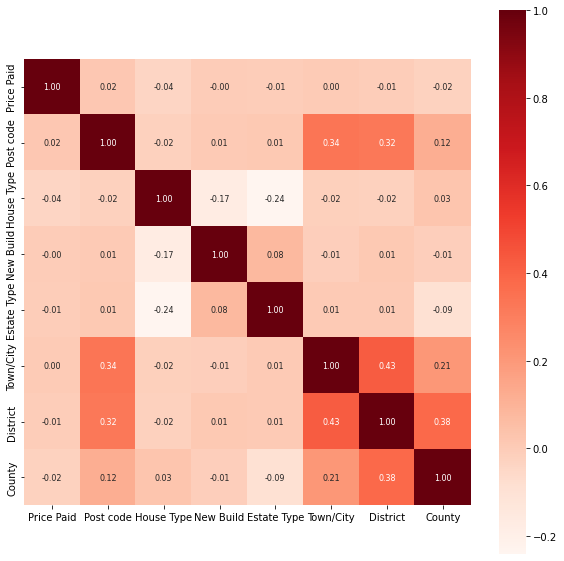

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, ,cbar=True, annot_kws,fmt = '.2f',={'size':8}, cmap='Reds')

In [ ]:

X = housing_dataframe.drop(['Price Paid'], axis=1)
Y = housing_dataframe['Price Paid']

In [ ]:
print(X)
print(Y)

         Post code  House Type  New Build  Estate Type  Town/City  District  \
0           486763           0          1            0        948       286   
1           486455           0          1            0       1139       286   
2           487034           4          1            0        948       286   
3           487034           3          1            0        948       286   
4           486346           0          1            0       1139       286   
...            ...         ...        ...          ...        ...       ...   
1002576     101798           3          1            0        210        49   
1002577     474287           0          1            0        702       119   
1002578     267631           4          1            0        895       294   
1002579     267629           4          1            0        895       294   
1002580     269635           0          1            0        639       309   

         County  
0            90  
1            90

In [ ]:
x_tr, , y_tr,Y_test = train_test_split(X, Y, test_size= 0.2,random_state= 5)

In [ ]:
print(X.shape,x_tr.shape, x_te.shape)

(997698, 7) (698388, 7) (299310, 7)


In [ ]:
print(x_tr.dtypes)
print(y_tr.dtypes)


Post code      int32
House Type      int8
New Build       int8
Estate Type     int8
Town/City      int16
District       int16
County          int8
dtype: object
int64


In [ ]:
#load the xgboost
xg_model = XGBRegressor()

In [ ]:
#TRAIN THE xg_model WITH x TRAIN
xg_model.fit(x_tr, y_tr)

[03:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# accuracy
traingd_pred = xg_model.predict(x_tr)

In [ ]:
print(traingd_pred)

[196150.25 194347.25 283347.75 ... 154155.36 405928.5  184224.48]


Text(0.5, 1.0, 'Actual vs Predicted prices')

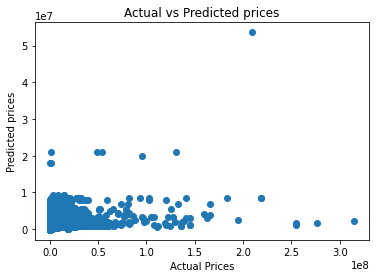

In [ ]:
plt.scatter(y_tr,traingd_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")

In [ ]:

#RMSE
score1 = sqrt(metrics.mean_squared_error(y_tr,traingd_pred))

#mean Absolute error
score2 = metrics.mean_absolute_error(y_tr,traingd_pred)

print("RMSE : " , score1)
print("MAE : " , score2)

RMSE :  1541110.6226300218
MAE :  188901.7035733525


In [ ]:
testdata_prediction = xg_model.predict(x_te)


Text(0.5, 1.0, 'Actual vs Predicted prices')

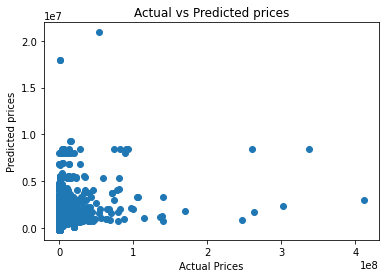

In [ ]:
plt.scatter(Y_test,testdata_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")

In [ ]:
#RMSE
score1 = sqrt(metrics.mean_squared_error(Y_test,testdata_prediction))

#mean Absolute error
score2 = metrics.mean_absolute_error(Y_test,testdata_prediction)

print("RMSE : " , score1)
print("MAE : " , score2)

RMSE :  1839311.3190021142
MAE :  191880.8138619639
